Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [32]:
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Split Data

In [33]:
df_25 = df.sample(frac=0.25, random_state=42)
df_25.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
67250    id2793718          2  2016-06-08 07:36:19  2016-06-08 07:53:39   
1397036  id3485529          2  2016-04-03 12:58:11  2016-04-03 13:11:58   
1021087  id1816614          2  2016-06-05 02:49:13  2016-06-05 02:59:27   
951424   id1050851          2  2016-05-05 17:18:27  2016-05-05 17:32:54   
707882   id0140657          1  2016-05-12 17:43:38  2016-05-12 19:06:25   

         passenger_count  pickup_longitude  pickup_latitude  \
67250                  1        -73.985611        40.735943   
1397036                1        -73.978394        40.764351   
1021087                5        -73.989059        40.744389   
951424                 2        -73.990326        40.731136   
707882                 4        -73.789497        40.646675   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
67250           -73.980331         40.760468                  N           1040  
1397036         -73.991623         40.749859                  N            827  
1021087         -73.973381         40.748692                  N            614  
951424          -73.991264         40.748917                  N            867  
707882          -73.987137         40.759232                  N           4967

Unsorted data Visualization

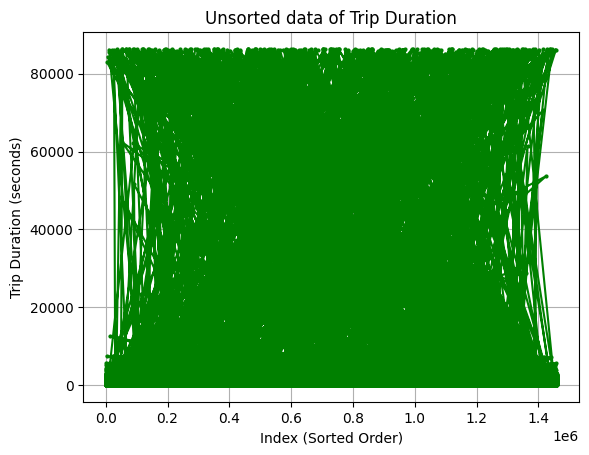

In [40]:
plt.plot(df_25["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Unsorted data of Trip Duration")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()

Short Proccessing using Quick Short Algoritm

In [34]:
def quick_sort_rows(data):
    if len(data) <= 1:
        return data
    pivot = data[len(data) // 2]
    pivot_value = pivot["trip_duration"]
    left = [row for row in data if row["trip_duration"] < pivot_value]
    middle = [row for row in data if row["trip_duration"] == pivot_value]
    right = [row for row in data if row["trip_duration"] > pivot_value]
    return quick_sort_rows(left) + middle + quick_sort_rows(right)

In [35]:
data_rows = df_25.to_dict(orient="records")

data_rows

[{'id': 'id2793718',
  'vendor_id': 2,
  'pickup_datetime': '2016-06-08 07:36:19',
  'dropoff_datetime': '2016-06-08 07:53:39',
  'passenger_count': 1,
  'pickup_longitude': -73.98561096191406,
  'pickup_latitude': 40.735942840576165,
  'dropoff_longitude': -73.98033142089844,
  'dropoff_latitude': 40.76046752929688,
  'store_and_fwd_flag': 'N',
  'trip_duration': 1040},
 {'id': 'id3485529',
  'vendor_id': 2,
  'pickup_datetime': '2016-04-03 12:58:11',
  'dropoff_datetime': '2016-04-03 13:11:58',
  'passenger_count': 1,
  'pickup_longitude': -73.9783935546875,
  'pickup_latitude': 40.76435089111328,
  'dropoff_longitude': -73.99162292480467,
  'dropoff_latitude': 40.749858856201165,
  'store_and_fwd_flag': 'N',
  'trip_duration': 827},
 {'id': 'id1816614',
  'vendor_id': 2,
  'pickup_datetime': '2016-06-05 02:49:13',
  'dropoff_datetime': '2016-06-05 02:59:27',
  'passenger_count': 5,
  'pickup_longitude': -73.98905944824217,
  'pickup_latitude': 40.744388580322266,
  'dropoff_longitud

In [36]:
sorted_rows = quick_sort_rows(data_rows)
df_sorted = pd.DataFrame(sorted_rows)
df_sorted.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2959956          1  2016-02-25 04:26:50  2016-02-25 04:26:51   
1  id2697717          2  2016-03-27 12:55:52  2016-03-27 12:55:53   
2  id0900936          2  2016-02-24 22:14:20  2016-02-24 22:14:21   
3  id0839864          1  2016-02-06 13:40:27  2016-02-06 13:40:28   
4  id2072503          1  2016-01-20 05:53:45  2016-01-20 05:53:46   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.806152        40.660206         -73.806267   
1                2        -73.983154        40.767159         -73.983238   
2                1        -74.004005        40.745125         -74.003998   
3                1        -73.987991        40.724083         -73.987991   
4                1        -73.807213        40.658192         -73.807259   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.660049                  N              1  
1         40.767097                  N              1  
2         40.745144                  N              1  
3         40.724079                  N              1  
4         40.658051                  N              1

Visualized the Sorted Data

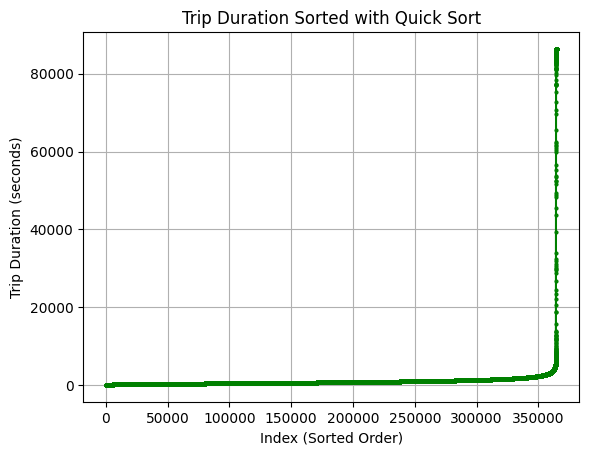

In [38]:
plt.plot(df_sorted["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Trip Duration Sorted with Quick Sort")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()


In [41]:
filltered_trip_duration = df_sorted[df_sorted['trip_duration']>=1000]
filltered_trip_duration

id  vendor_id      pickup_datetime     dropoff_datetime  \
261112  id1322812          1  2016-05-23 22:21:19  2016-05-23 22:37:59   
261113  id2832090          2  2016-05-23 10:22:59  2016-05-23 10:39:39   
261114  id3576567          2  2016-03-15 16:06:59  2016-03-15 16:23:39   
261115  id1493082          2  2016-03-27 22:40:13  2016-03-27 22:56:53   
261116  id2467423          1  2016-04-02 12:31:07  2016-04-02 12:47:47   
...           ...        ...                  ...                  ...   
364656  id0526370          2  2016-02-17 14:44:05  2016-02-18 14:43:27   
364657  id3741436          2  2016-02-21 00:46:56  2016-02-22 00:46:21   
364658  id1440188          2  2016-03-09 02:59:46  2016-03-10 02:59:12   
364659  id2307896          2  2016-05-14 04:48:05  2016-05-15 04:47:42   
364660  id0593332          2  2016-05-31 13:00:39  2016-06-01 13:00:30   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
261112                1        -73.992401        40.758331         -73.976318   
261113                2        -73.947166        40.776131         -73.964378   
261114                1        -73.975037        40.754677         -74.002625   
261115                1        -73.863777        40.769798         -73.947601   
261116                1        -73.962357        40.779087         -73.984306   
...                 ...               ...              ...                ...   
364656                1        -73.972183        40.745804         -73.966812   
364657                3        -73.986298        40.734531         -73.992271   
364658                4        -73.939819        40.798328         -73.924026   
364659                1        -74.000504        40.732121         -73.994202   
364660                1        -73.781952        40.644688         -73.993874   

        dropoff_latitude store_and_fwd_flag  trip_duration  
261112         40.744144                  N           1000  
261113         40.764690                  N           1000  
261114         40.760578                  N           1000  
261115         40.710522                  N           1000  
261116         40.759766                  N           1000  
...                  ...                ...            ...  
364656         40.753181                  N          86362  
364657         40.749088                  N          86365  
364658         40.807671                  N          86366  
364659         40.712418                  N          86377  
364660         40.745926                  N          86391  

[103549 rows x 11 columns]

Shorted Data Visualization

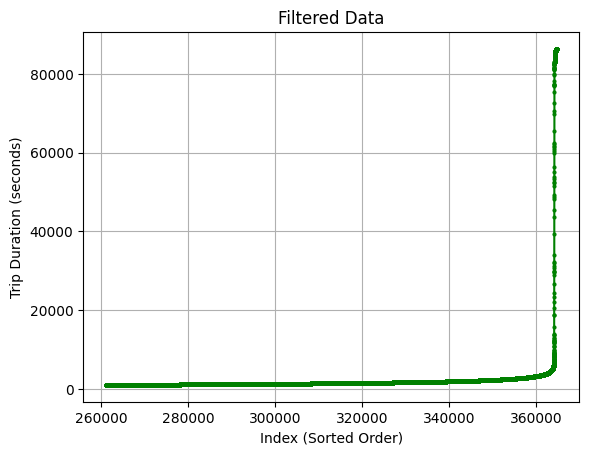

In [42]:
plt.plot(filltered_trip_duration["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Filtered Data")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()


Filter data > 1000